# Hazard Of Smartphone using Clustering 

# 📘 Introduction
In today's digital age, smartphones have become an indispensable part of daily life, especially for teenagers. While offering numerous benefits, excessive smartphone use among adolescents has raised significant concerns regarding its potential negative impacts on their well-being. This project aims to investigate the patterns and consequences of smartphone usage on teenagers, focusing on its relationship with addiction levels. By analyzing survey data, we seek to uncover how smartphone habits correlate with crucial aspects of adolescent life, including sleep quality, academic performance, and mental health.

# 🎯 Objectives:
Explore the relationship between smartphone usage and addiction levels: Investigate whether increased phone usage directly correlates with higher levels of addiction among teenagers.

Identify hidden groups of users with similar behaviors: Utilize K-Means clustering to segment teenagers into distinct groups based on their smartphone habits and related lifestyle factors. This will help in identifying high-risk profiles.

Analyze the impact of lifestyle factors on addiction: Examine how variables such as sleep patterns, gaming time, and academic engagement influence smartphone addiction levels.

Provide data-driven insights for intervention: Offer a comprehensive understanding of the multifaceted impact of smartphone use on teens' daily lives, informing potential strategies for promoting healthier digital habits.

This project leverages techniques such as correlation analysis and K-Means clustering to achieve its objectives. Understanding these patterns is crucial as excessive phone use among teenagers has been linked to sleep problems, lower academic performance, anxiety, and other mental health challenges.

## LIBRARIES

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# EXPLANATORY DATA ANALYSIS

In [30]:
dataset = pd.read_csv("Hazard of Smartphone.csv")
df = dataset.copy()
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Age,3000.0,15.969667,1.989489,13.0,14.00,16.0,18.00,19.0
Daily_Usage_Hours,3000.0,5.020667,1.956501,0.0,3.70,5.0,6.40,11.5
Sleep_Hours,3000.0,6.489767,1.490713,3.0,5.50,6.5,7.50,10.0
Academic_Performance,3000.0,74.947333,14.684156,50.0,62.00,75.0,88.00,100.0
Social_Interactions,3000.0,5.097667,3.139333,0.0,2.00,5.0,8.00,10.0
Exercise_Hours,3000.0,1.040667,0.734620,0.0,0.50,1.0,1.50,4.0
Anxiety_Level,3000.0,5.590000,2.890678,1.0,3.00,6.0,8.00,10.0
Depression_Level,3000.0,5.460333,2.871557,1.0,3.00,5.0,8.00,10.0
Self_Esteem,3000.0,5.546333,2.860754,1.0,3.00,6.0,8.00,10.0


<p>
At first glance, dataset features are about social skills, psychological state, academic success, how much time spend with internet and digital devices

Before looking the features distribution I want to figure out the correlation between the features</p>

## CORRELATION AND THEIR VISUALIZATION

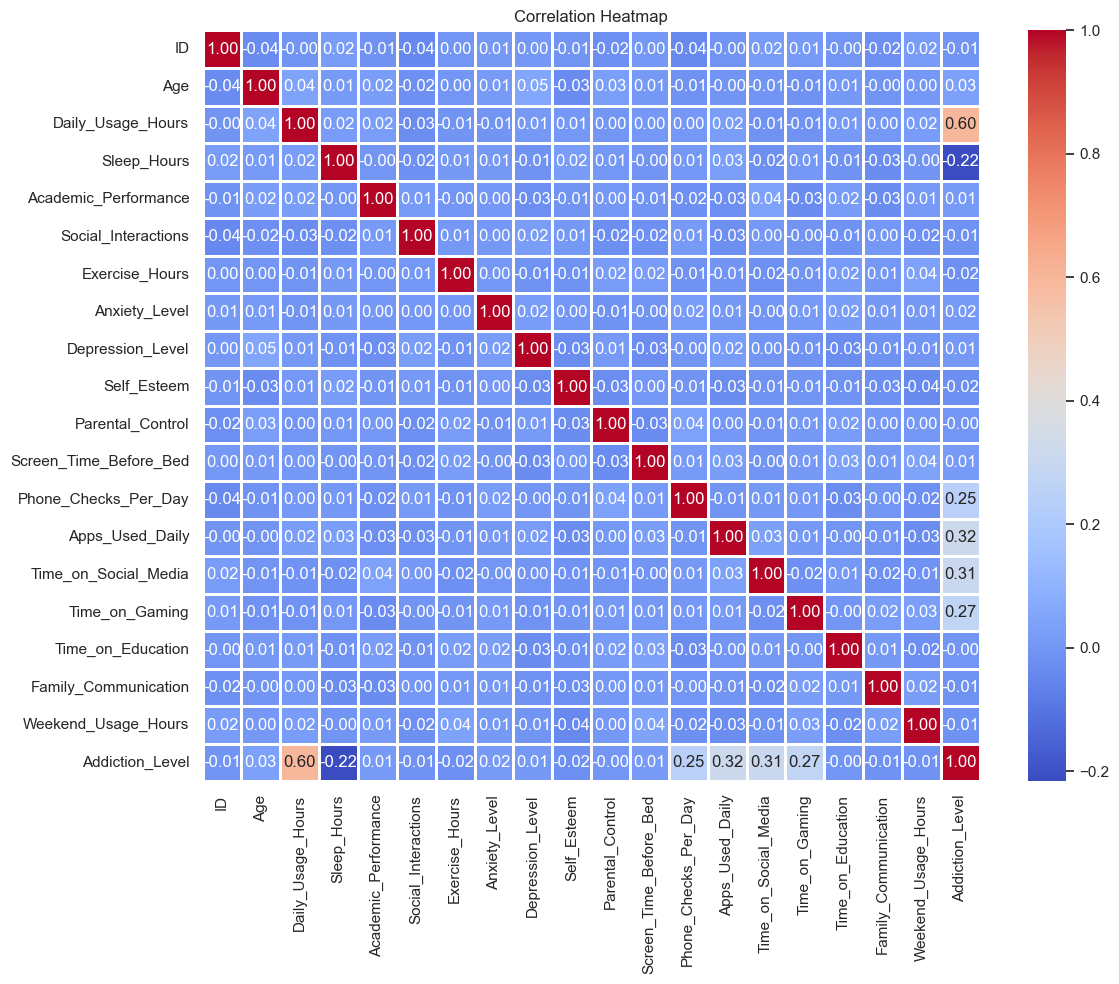

In [33]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=0.8)

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**Daily_Usage_Hours has a sufficiently strong positive correlation with Addiction_Level (0.60).**
- This means: people who use their phone more daily tend to have higher addiction levels.

**Apps_Used_Daily, Time_on_Social_Media, and Time_on_Gaming also have a moderate positive relationship with Addiction_Level**
- Their correlation values are around 0.27 – 0.32
- So using more apps or spending more time on social media/games can be linked to higher addiction.

**Phone_Checks_Per_Day also goes up with Addiction_Level (correlation: 0.25)**

On the other hand, features like Sleep_Hours, Age, Academic_Performance, Exercise_Hours, or Depression_Level have very low or no strong connection with addiction in this dataset.

Also, Family_Communication, Parental_Control, and Social_Interactions don’t show a meaningful relationship with addiction.

According to the analysis above, I want to view the features that have corr with addiction_level

## FEATURES DISTRIBUTION AND VALUE INTERVAL

<Axes: ylabel='Age'>

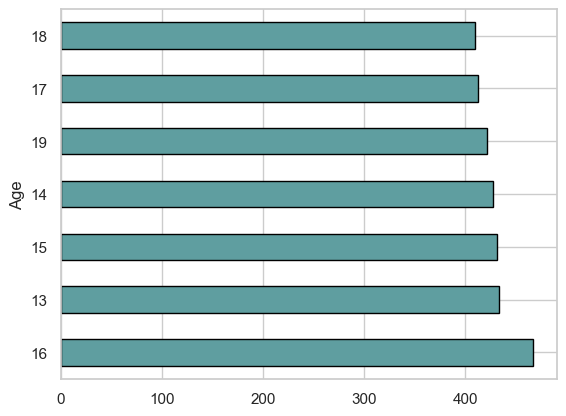

In [34]:
df["Age"].value_counts().plot(kind="barh", color="#5F9EA0", edgecolor="black")

**Teens' age are well-distributed between 13-19**

<Axes: ylabel='Gender'>

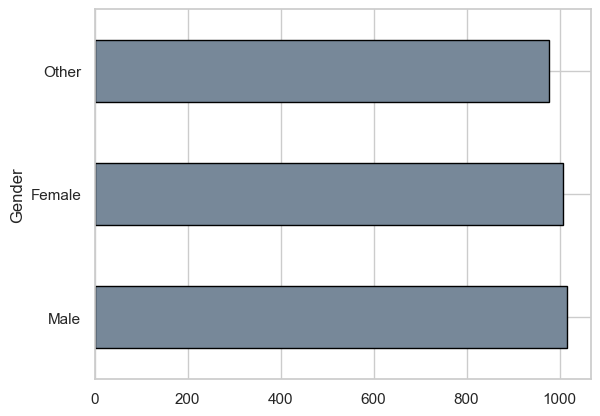

In [35]:
df["Gender"].value_counts().plot(kind="barh", color="#778899", edgecolor="black")

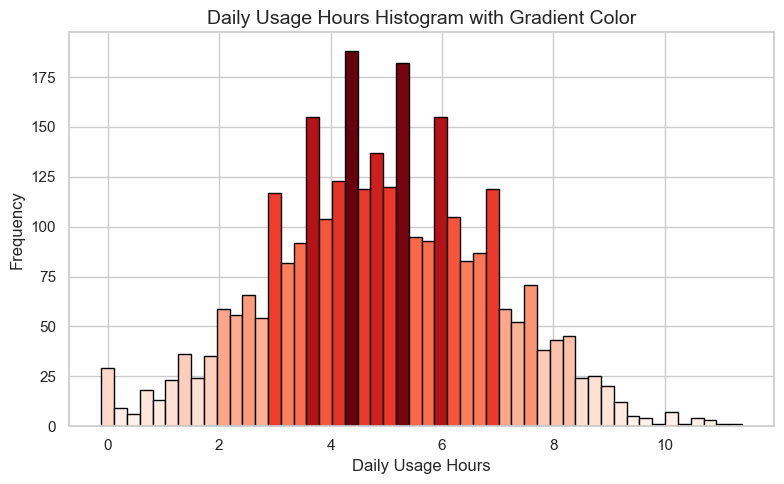

In [36]:
counts, bins = np.histogram(df["Daily_Usage_Hours"], bins=50)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Color Normalization
norm = plt.Normalize(counts.min(), counts.max())
colors = cm.Reds(norm(counts))

plt.figure(figsize=(8, 5))
for count, left, right, color in zip(counts, bins[:-1], bins[1:], colors):
    plt.bar(left, count, width=right-left, color=color, edgecolor='black')

plt.title("Daily Usage Hours Histogram with Gradient Color", fontsize=14)
plt.xlabel("Daily Usage Hours", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

**The data appears to be approximately normally distributed with a slight right skew. Most users spend between 4 and 6 hours per day, as indicated by the peak in this range.**

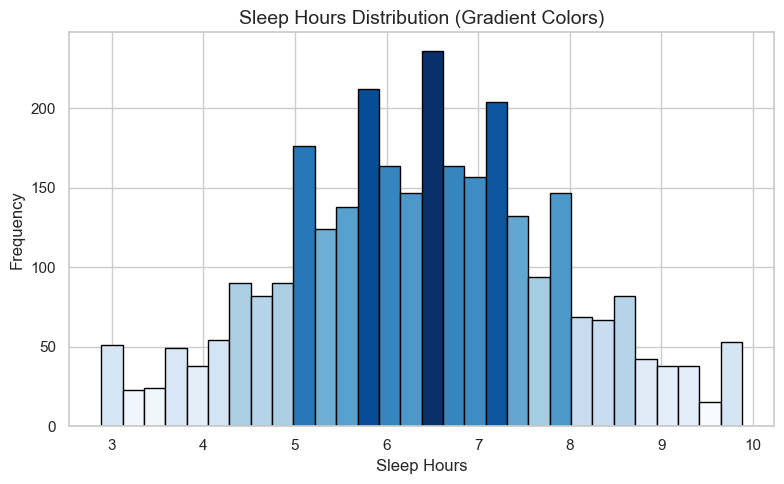

In [37]:
counts, bins = np.histogram(df["Sleep_Hours"], bins=30)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Color Normalization
norm = plt.Normalize(counts.min(), counts.max())
colors = cm.Blues(norm(counts))

plt.figure(figsize=(8, 5))
for count, left, right, color in zip(counts, bins[:-1], bins[1:], colors):
    plt.bar(left, count, width=right-left, color=color, edgecolor='black')

plt.title("Sleep Hours Distribution (Gradient Colors)", fontsize=14)
plt.xlabel("Sleep Hours", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

**Most people sleep between 6 and 7 hours, while fewer people sleep very little or a lot.**

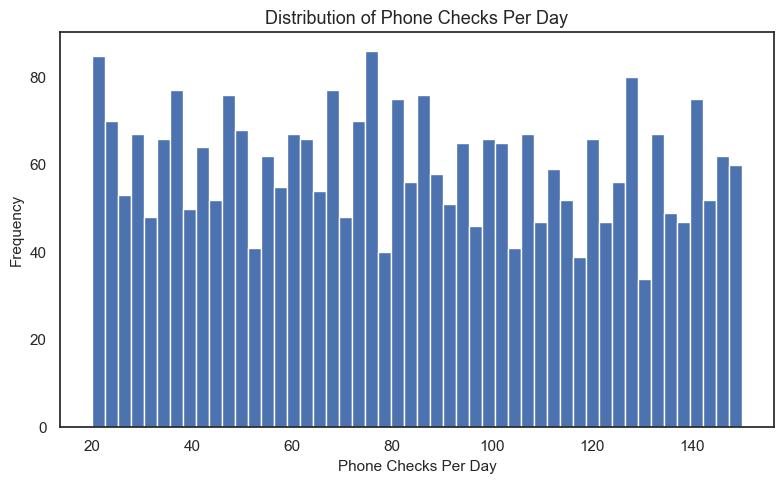

In [38]:
sns.set_theme(style="white")

plt.figure(figsize=(8, 5))
plt.hist(df["Phone_Checks_Per_Day"], bins=50, color="#4C72B0", edgecolor='white')

plt.title("Distribution of Phone Checks Per Day", fontsize=13)
plt.xlabel("Phone Checks Per Day", fontsize=11)
plt.ylabel("Frequency", fontsize=11)

plt.tight_layout()
plt.show()

**The numbers are spread out fairly evenly, so people check their phones a lot or a little, but there isn’t one common number that most people follow.**

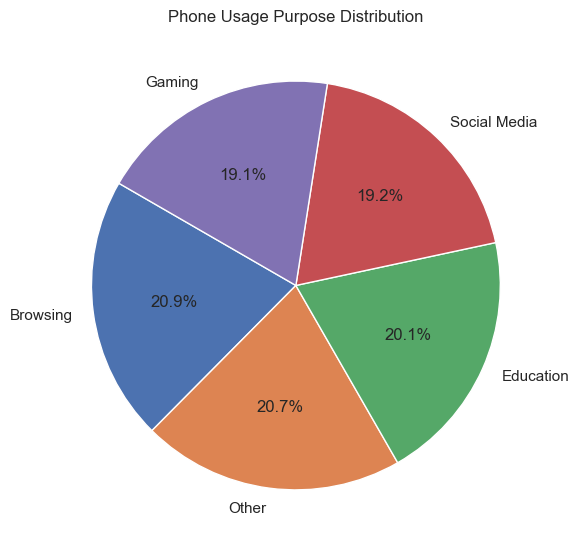

In [39]:
purpose_counts = df["Phone_Usage_Purpose"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(purpose_counts, 
        labels=purpose_counts.index, 
        autopct='%1.1f%%', 
        startangle=150, 
        wedgeprops=dict(edgecolor='w'))

plt.title("Phone Usage Purpose Distribution")
plt.tight_layout()
plt.show()

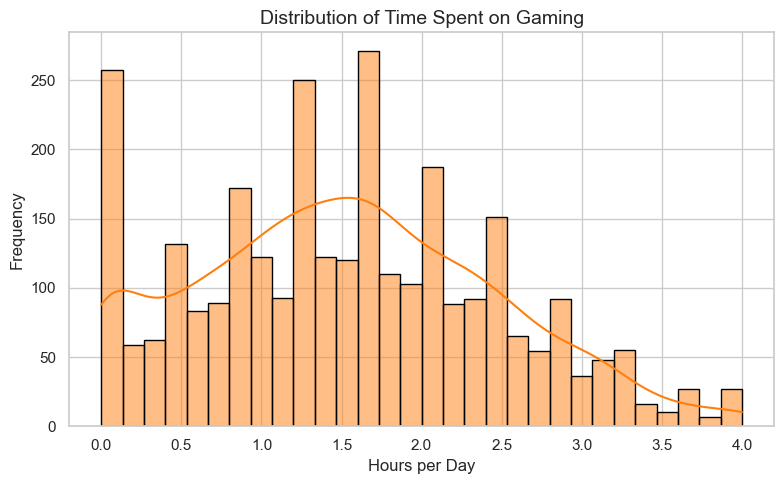

In [40]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))

sns.histplot(df["Time_on_Gaming"], 
             bins=30, 
             kde=True,
             color="#FF7F0E",
             edgecolor='black')

plt.title("Distribution of Time Spent on Gaming", fontsize=14)
plt.xlabel("Hours per Day", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

**Most people play for about 1 to 2 hours, while smaller group either plays a lot more or doesn't play at all.**

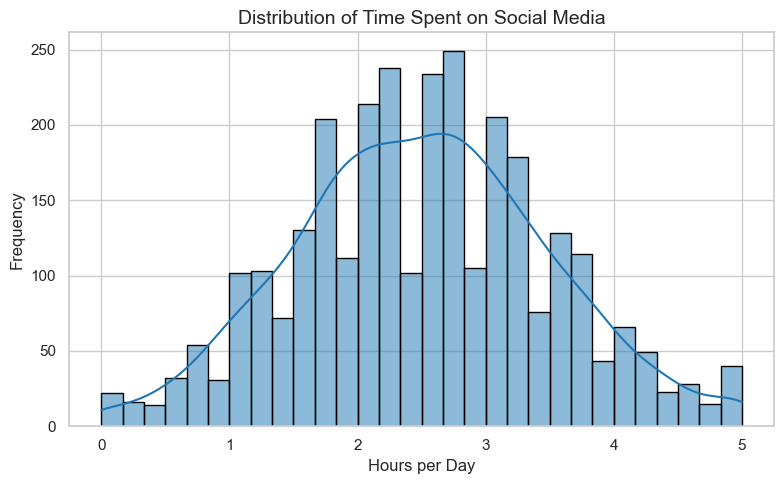

In [41]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(df["Time_on_Social_Media"], 
             bins=30, 
             kde=True,
             color="#1F77B4",
             edgecolor='black')

plt.title("Distribution of Time Spent on Social Media", fontsize=14)
plt.xlabel("Hours per Day", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

**Most people use it around 2 to 3 hours daily, and very few spend either too little or too much time on it. The pattern looks like a bell shape, meaning most users fall near the average.**

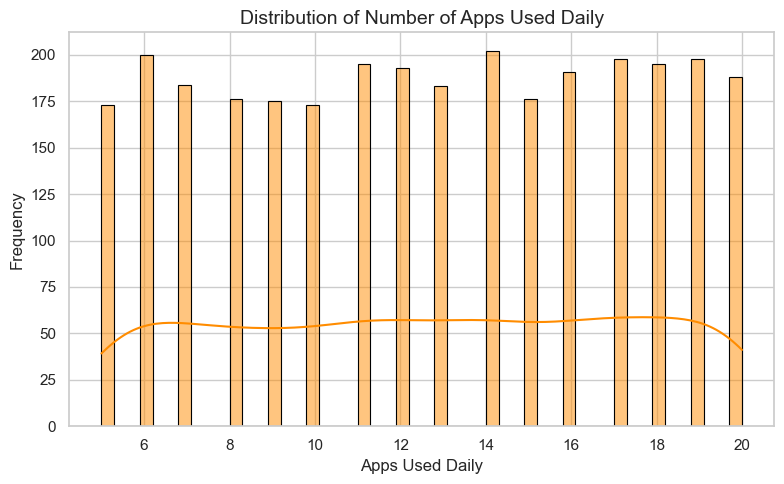

In [42]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.histplot(df["Apps_Used_Daily"], 
             bins=50, 
             kde=True, 
             color="#FF8C00",
             edgecolor="black")

plt.title("Distribution of Number of Apps Used Daily", fontsize=14)
plt.xlabel("Apps Used Daily", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

**Most users seem to use between 6 and 20 apps daily, and the numbers are fairly balanced across this range, with no clear favorite or peak.**

## SCATTER VISUALISATION

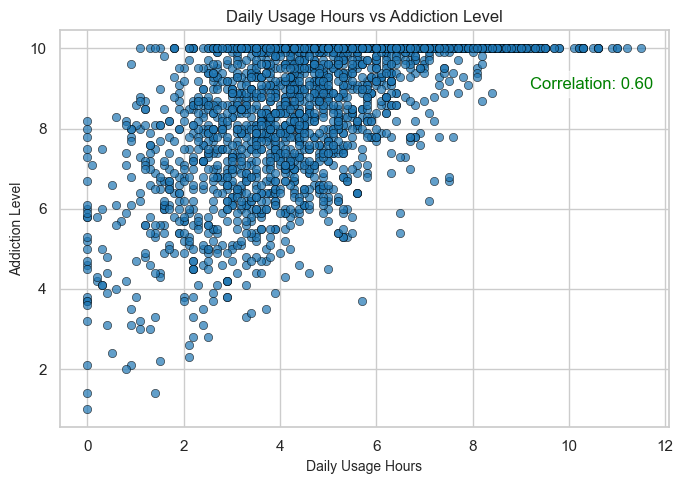

In [43]:
corr = df["Daily_Usage_Hours"].corr(df["Addiction_Level"])

plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, 
                x="Daily_Usage_Hours", 
                y="Addiction_Level", 
                alpha=0.7, 
                color="#1f77b4", 
                edgecolor="black")

plt.text(x=df["Daily_Usage_Hours"].max() * 0.8,
         y=df["Addiction_Level"].max() * 0.9,
         s=f"Correlation: {corr:.2f}",
         fontsize=12,
         color="green",
         bbox=dict(facecolor="white", alpha=0.6))

plt.title("Daily Usage Hours vs Addiction Level", fontsize=12)
plt.xlabel("Daily Usage Hours", fontsize=10)
plt.ylabel("Addiction Level", fontsize=10)

plt.tight_layout()
plt.show()

## CLUSTERING

In [44]:
# strong or moderate corr features
features = df[[
    "Daily_Usage_Hours", 
    "Addiction_Level", 
    "Apps_Used_Daily", 
    "Phone_Checks_Per_Day", 
    "Time_on_Social_Media", 
    "Time_on_Gaming",
    "Sleep_Hours"
]]



In [45]:
# Standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

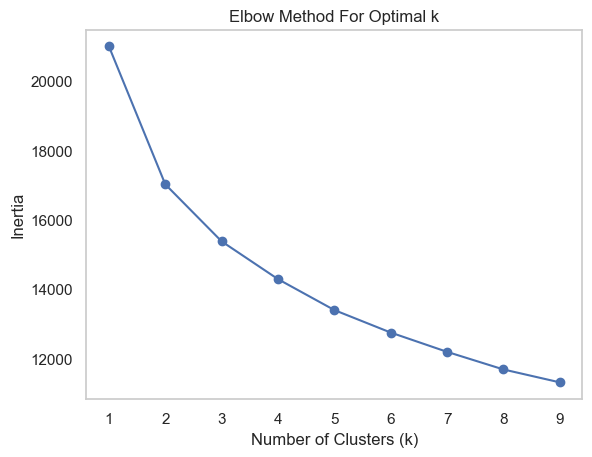

In [46]:
inertia = []

for k in range(1, 10):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.show()

Elbow is not exactly clear, so I can view **Silhoutte Score**

In [47]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    print(f"k = {k}, silhouette score = {score:.3f}")

k = 2, silhouette score = 0.195
k = 3, silhouette score = 0.140
k = 4, silhouette score = 0.133
k = 5, silhouette score = 0.132
k = 6, silhouette score = 0.129
k = 7, silhouette score = 0.129
k = 8, silhouette score = 0.122
k = 9, silhouette score = 0.120


k = 2 makes clearer and more meaningful distinctions.

In [48]:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_features)

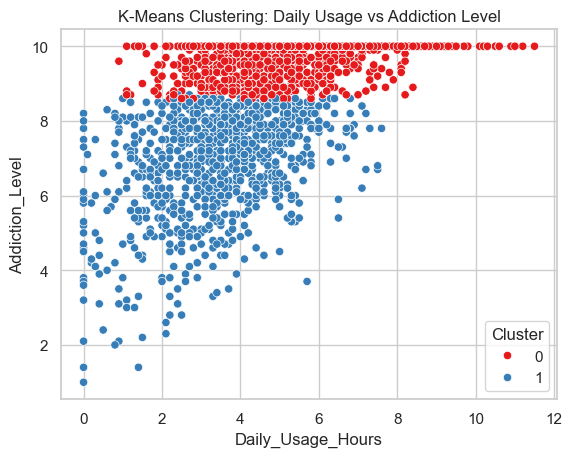

In [49]:
sns.scatterplot(data=df, 
                x="Daily_Usage_Hours", 
                y="Addiction_Level", 
                hue="Cluster", 
                palette="Set1")

plt.title("K-Means Clustering: Daily Usage vs Addiction Level")
plt.show()

The red cluster **(Cluster 0)** mostly includes users with very high addiction levels (9–10).

The blue cluster **(Cluster 1)** contains users with moderate to high addiction levels, and they are more spread out across different daily usage times.

It seems that longer daily phone usage increases the chance of being in the high addiction cluster.

**However, even some users with low daily usage are still highly addicted — so time alone is not the only factor.**

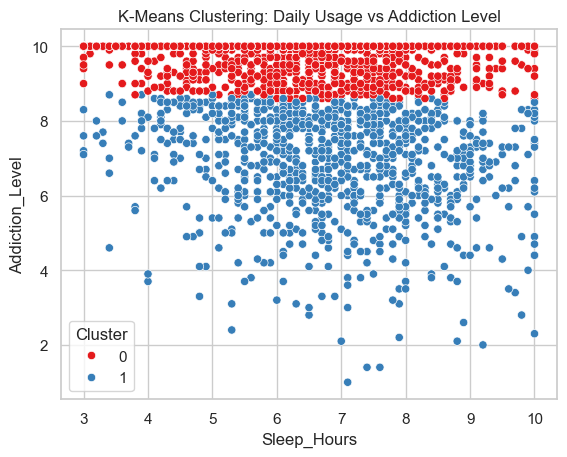

In [50]:
sns.scatterplot(data=df, 
                x="Sleep_Hours", 
                y="Addiction_Level", 
                hue="Cluster", 
                palette="Set1")

plt.title("K-Means Clustering: Daily Usage vs Addiction Level")
plt.show()

The red cluster **(Cluster 0)** again shows users with addiction levels near 10, even though their sleep hours range from 4 to 9+ hours.

The blue cluster **(Cluster 1)** has users with more varied addiction levels, generally lower than Cluster 0.

**There is no clear pattern between sleep hours and addiction** — people with both low and high sleep durations can be highly addicted.

This suggests that sleep is not a strong separator for addiction level in this dataset.

## HIERARCHICAL CLUSTERING

In [51]:
linked = linkage(scaled_features, method='ward')

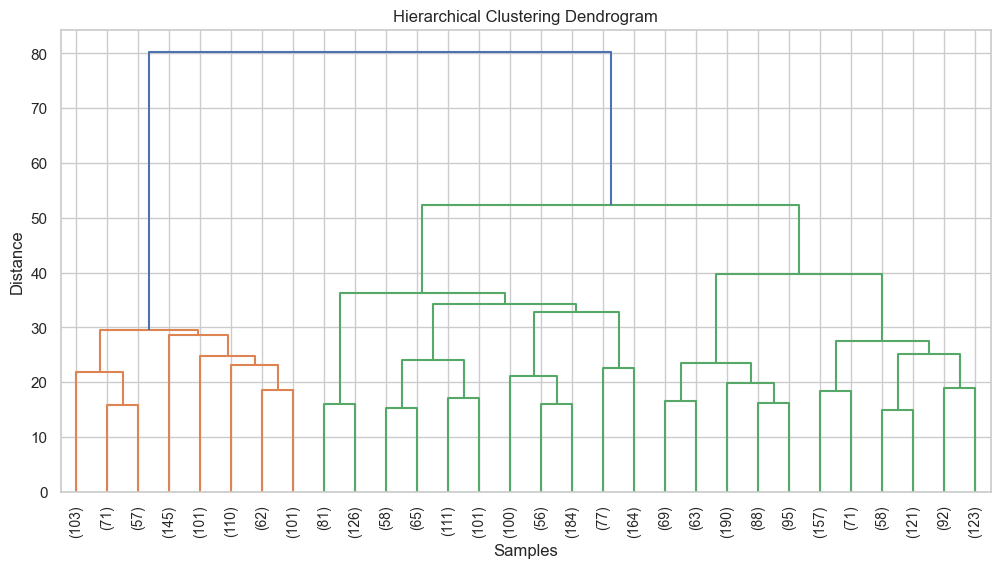

In [52]:
plt.figure(figsize=(12, 6))
dendrogram(linked,
           truncate_mode='lastp',
           p=30,
           leaf_rotation=90.,
           leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()

In [53]:
df["HCluster"] = fcluster(linked, 2, criterion='maxclust')

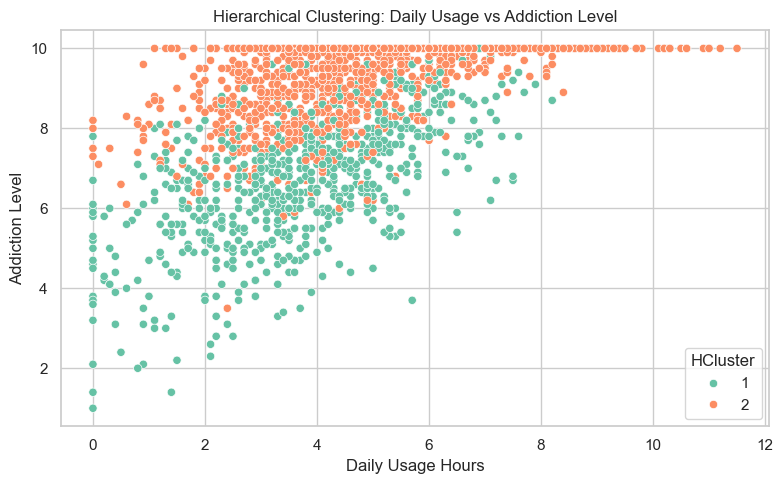

In [54]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, 
                x="Daily_Usage_Hours", 
                y="Addiction_Level", 
                hue="HCluster", 
                palette="Set2")

plt.title("Hierarchical Clustering: Daily Usage vs Addiction Level")
plt.xlabel("Daily Usage Hours")
plt.ylabel("Addiction Level")
plt.tight_layout()
plt.show()

C:\Users\91960\AppData\Local\Temp\ipykernel_3228\1422419992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="HCluster", y="Addiction_Level", palette="Set3")


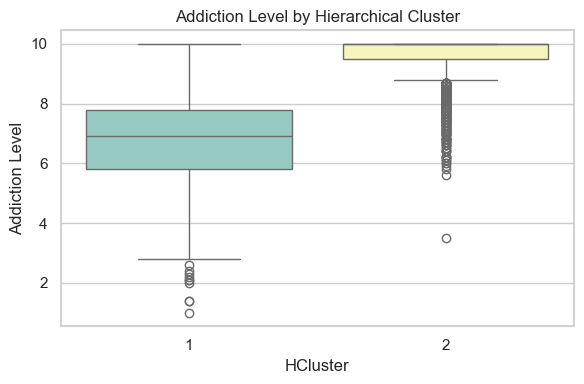

In [55]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="HCluster", y="Addiction_Level", palette="Set3")

plt.title("Addiction Level by Hierarchical Cluster")
plt.xlabel("HCluster")
plt.ylabel("Addiction Level")
plt.tight_layout()
plt.show()


- In this part, I used hierarchical clustering to group users based on their phone usage and addiction levels. I decided to create 2 clusters and checked how they were separated.

- From the first scatter plot, I saw that Cluster 2 (orange) mostly includes people with very high addiction levels — close to 10. On the other hand, Cluster 1 (green) has users with more mixed addiction levels and different usage times.

- The second boxplot also shows this clearly. Cluster 2 has very high addiction scores for almost everyone, while Cluster 1 has a wider range — from low to medium levels.

- So overall, I think hierarchical clustering worked better than K-Means here. It did a better job at finding the group of highly addicted users and showed a clearer separation between the two clusters.

**However, the plots still don’t show a perfect separation — some users are spread between clusters, and the results are not 100% clear.**